# 2. Laboratorijska vježba

## 1. zadatak (25%)
Proučite i skicirajte model zadan objektom net u skripti train.py. 


![primjer filtra](https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

#### Podzadatak a)
Odredite veličine tenzora u svakom sloju.
#### Odgovor a)
1. ulaz: $50\times 1\times 28\times 28$
2. nakon prvog konvolucijskog sloja: $50 \times 16 \times 28 \times 28$
    - 16 filtara
    - 5x5 jezgra
    - stride 1
    - same padding
3. nakon prvog pooling sloja: $50 \times 16 \times 14 \times 14$
    - 2x2 jezgra
    - stride 2
4. nakon prve aktivacije: $50 \times 16 \times 14 \times 14$
5. nakon drugog konvolucijskog sloja: $50 \times 32 \times 14 \times 14$
    - 32 filtera
    - 16x5x5 jezgra
    - stride 1
    - same padding
6. nakon drugog pooling sloja: $50 \times 32 \times 7 \times 7$
    - 2x2 jezgra
    - stride 2
7. nakon druge akrivacije: $50 \times 32 \times 7 \times 7$
8. izravnato: $50 \times 1568$
9. nakon prvog potpuno povezanog sloja: $50 \times 512$
    - 512 neurona
10. nakon treće aktivacije: $50 \times 512$
11. nakon drugog potpuno povezanog sloja: $50 \times 10$
    - 10 neurona

> objašnjenje: pod 2 imamo 16 filtara pa je sama dubina 16, a veličinu dobivamo prema formuli $\lfloor \frac{input - kernel + 2*padding}{stride}\rfloor+1$

#### Podzadatak b)
Odredite broj parametara u svakom sloju
#### Odgovor b)
1. ulaz: 0
2. prvi konvolucijski sloj: 416
    - 16 filtara
    - 5x5 jezgra
3. prvi pooling sloj: 0
4. prva aktivacija: 0
5. drugi konvolucijski sloj: 12832
    - 32 filtera
    - 16x5x5 jezgra
6. drugi pooling sloj: 0
7. druga akrivacija: 0
8. izravnato: 0
9. prvi potpuno povezani sloj: 803328
    - 512 neurona
10. treća aktivacija: 0
11. drugi potpuno povezani sloj: 5130
    - 10 neurona

> objašnjenje: pod 2 imamo 16 filtara svaki veličine 5x5, te na svaki dodajemo po jedan bias $16*5*5 + 16 = 416$

#### Podzadatak c)
Odredite veličinu receptivnog polja značajki iz posljednjeg (drugog) konvolucijskog sloja
#### Odgovor c)
Veličina receptivnog polja:
- 1 parametar drugog konvolucijskog sloja vidi 5 parametara prvog pooling sloja
- 1 parametar prvog pooling sloja vidi 2 parametara prvog konvolucijskog sloja
- 1 parametar drugog konvolucijskog sloja vidi 10 parametara prvog konvolucijskog sloja
- 1 parametar prvog konvolucijskog sloja vidi 5 ulaza
- 1 parametar drugog konvolucijskog sloja vidi 14 parametara ulaza (zbog preklapanja)


#### Podzadatak d)
Procijenite ukupnu količinu memorije za pohranjivanje aktivacija koje su potrebne za provođenje backpropa ako učimo s mini-grupama od 50 slika.
#### Odgovor d)
Ukupna količina memorije za pohranjihvanje aktivacija:
- ukupno parametara za jednu mini grupu: 5130 + 803328 + 12832 + 416 = 821706
- ukoliko jedan podatak zauzima 8 bajtova, onda ukupno zauzima: 6,573,648 B
- u megabajtima: 6.27 MB

#### Podzadatak e)
Odredite vezu između početnog iznosa funkcije gubitka i broja razreda C. Tijekom učenja možete promatrati vizualizaciju filtara koji se spremaju u kazalo SAVE_DIR. Budući da svaka težina odgovara jednom pikselu slike, u vašem pregledniku isključite automatsko glađenje slike. Preporuka je da na Linuxu koristite preglednik Geeqie.
#### Odgovor e)
Što je manje grupa to će biti manji početni iznos funkcije gubitka jer nasumičnim odabirom imamo veću točnost.

<style>
    img {
        image-rendering: optimizeSpeed;             /* STOP SMOOTHING, GIVE ME SPEED  */
        image-rendering: -moz-crisp-edges;          /* Firefox                        */
        image-rendering: -o-crisp-edges;            /* Opera                          */
        image-rendering: -webkit-optimize-contrast; /* Chrome (and eventually Safari) */
        image-rendering: pixelated; /* Chrome */
        image-rendering: optimize-contrast;         /* CSS3 Proposed                  */
        -ms-interpolation-mode: nearest-neighbor;   /* IE8+                           */
    }
</style>

<img src="out/train/conv1_epoch_08_step_050000_input_000_scaled.png" width="400" style="image-rendering=pixelated;">


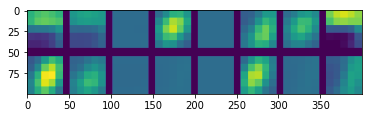

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("out/train_l2reg/0.1/conv1_epoch_08_step_050000_input_000_scaled.png")
plt.imshow(image)

## 2. zadatak (25%)

U ovom zadatku treba dodati podršku za L2 regularizaciju parametara. Proučite efekte regularizacijskog hiper-parametra tako da naučite tri različita modela s λ=1e−3,λ=1e−2,λ=1e−1 te usporedite naučene filtre u prvom sloju i dobivenu točnost.

#### $\lambda = 0.001$
- Train accuracy = 99.46
- Validation accuracy = 99.10
- Test accuracy = 99.14

<img src="out/train_l2reg/0.001/conv1_epoch_01_step_000000_input_000_scaled.png" style="image-rendering=pixelated;">
<img src="out/train_l2reg/0.001/conv1_epoch_08_step_050000_input_000_scaled.png" style="image-rendering=pixelated;">


#### $\lambda = 0.01$
- Train accuracy = 98.80
- Validation accuracy = 98.88
- Test accuracy = 98.74


<img src="out/train_l2reg/0.01/conv1_epoch_01_step_000000_input_000_scaled.png" style="image-rendering=pixelated;">
<img src="out/train_l2reg/0.01/conv1_epoch_08_step_050000_input_000_scaled.png" style="image-rendering=pixelated;">

#### $\lambda = 0.1$
- Train accuracy = 96.24
- Validation accuracy = 97.24
- Test accuracy = 96.46

<img src="out/train_l2reg/0.1/conv1_epoch_01_step_000000_input_000_scaled.png" style="image-rendering=pixelated;">
<img src="out/train_l2reg/0.1/conv1_epoch_08_step_050000_input_000_scaled.png" style="image-rendering=pixelated;">




Možemo vidjeti da regularizacija uvelike utječe na izgled filtera. Regularizacija s $\lambda = 0.1$ je prejaka, te to možemo zaključiti po tome što su oblici veliki, te čak 6 filtera nema neku ulogu. Regularizacija $\lambda = 0.001$ je preslaba, te to možemo zaključiti na temelju granulatosti filtera. Parametar $\lambda = 0.01$ je optimalan. Kod tih filtera možemo vidjeti pravilne oblike koji se pojavljuju kod nekih znamenki. Taj model nema najveću točnost na skupu za testiranje, ali bi najvjerojatnije bolje radio nego prvi.

## 3. zadatak (25%)
U PyTorchu definirajte i naučite model koji je ekvivalentan regulariziranom modelu iz 2. zadatka.

#### $\lambda = 0.001$
- Train accuracy = 99.56
- Validation accuracy = 99.08
- Test accuracy = 99.17

<img src="out/3_pytorch_conv/0.001/conv1_epoch_00_step_000000_input_000_scaled.png" style="image-rendering=pixelated;">
<img src="out/3_pytorch_conv/0.001/conv1_epoch_07_step_050000_input_000_scaled.png" style="image-rendering=pixelated;">


#### $\lambda = 0.01$
- Train accuracy = 98.36
- Validation accuracy = 98.50
- Test accuracy = 98.41


<img src="out/3_pytorch_conv/0.01/conv1_epoch_00_step_000000_input_000_scaled.png" style="image-rendering=pixelated;">
<img src="out/3_pytorch_conv/0.01/conv1_epoch_07_step_050000_input_000_scaled.png" style="image-rendering=pixelated;">

#### $\lambda = 0.1$
- Train accuracy = 93.12
- Validation accuracy = 94.98
- Test accuracy = 93.72

<img src="out/3_pytorch_conv/0.1/conv1_epoch_00_step_000000_input_000_scaled.png" style="image-rendering=pixelated;">
<img src="out/3_pytorch_conv/0.1/conv1_epoch_07_step_050000_input_000_scaled.png" style="image-rendering=pixelated;">

Kretanje gubitka kroz epohe

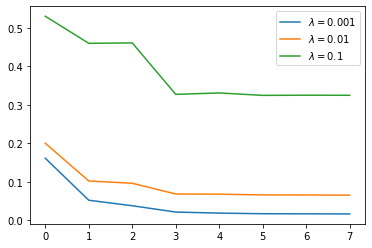

In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path

with open('./out/3_pytorch_conv/0.001/losses.txt') as f:
    losses3 = f.read().splitlines()
    
with open('./out/3_pytorch_conv/0.01/losses.txt') as f:
    losses2 = f.read().splitlines()
    
with open('./out/3_pytorch_conv/0.1/losses.txt') as f:
    losses1 = f.read().splitlines()
    
losses3 = [float(i) for i in losses3]
losses2 = [float(i) for i in losses2]
losses1 = [float(i) for i in losses1]

x = np.arange(8)
plt.plot(x, losses3, label="$\lambda = 0.001$")
plt.plot(x, losses2, label="$\lambda = 0.01$")
plt.plot(x, losses1, label="$\lambda = 0.1$")
plt.legend(loc='best')
plt.show()

## 4. zadatak (25%)

U PyTorchu naučiti konvolucijski model na CIFAR skupu.

#### Podzadatak a)
Ostvarivanje mreže te funkcije evaluate koja na temelju predviđenih i točnih indeksa razreda određuje pokazatelje klasifikacijske performanse: ukupnu točnost klasifikacije, matricu zabune (engl. confusion matrix) u kojoj retci odgovaraju točnim razredima a stupci predikcijama te mjere preciznosti i odziva pojedinih razreda.

#### Odgovor a)
Nakon ostvarenja mreže i treniranja dobivamo sljedeće rezultate
```
Running evaluation:  Train
Train accuracy = 72.51
Train avg loss = 0.80

Train confusion matrix
 [[3289  170  223   48   95   29   29   66  316  226]
 [  43 3921   30   20   12   10   24   12   71  351]
 [ 255   68 2705  188  471  263  245  184   74   61]
 [  78   56  319 2237  294  772  286  247  106  118]
 [ 106   30  287  155 3134  132  167  377   48   52]
 [  29   39  269  614  243 2679  122  375   48   71]
 [  19   66  231  191  256  131 3485   41   37   65]
 [  39   19  113  117  232  171   28 3647   27  108]
 [ 199  200   36   26   35   12   22    7 3768  190]
 [  79  399   25   39   14   19   23   42   89 3764]]
Train precisions = [0.7952127659574468, 0.7892512077294686, 0.6382727701746107, 0.6154057771664374, 0.6548265775177602, 0.6351351351351351, 0.7865041751297676, 0.7296918767507002, 0.8219895287958116, 0.7518977227327207]
Train recalls f= [0.732353596081051, 0.8724966622162884, 0.599246787771378, 0.4956791491247507, 0.698306595365419, 0.5967921586099354, 0.7706766917293233, 0.8102643856920684, 0.8382647385984427, 0.8377476073892722]

Running evaluation:  Validation
Validation accuracy = 67.00
Validation avg loss = 0.96

Validation confusion matrix
 [[350  24  33   7  10   2   2   6  54  21]
 [  9 411   1   0   2   2   3   3  10  65]
 [ 24   5 277  27  47  41  29  25   5   6]
 [  6   5  33 210  40  90  36  32  15  20]
 [ 23   3  35  32 316  22  22  49   4   6]
 [  7   7  35  72  31 281  11  49   9   9]
 [  3   5  26  21  25  22 359   6   4   7]
 [  6   4  22  13  31  24   6 373   6  14]
 [ 36  31   8   5   3   0   6   2 389  25]
 [ 15  67   5   3   4   4   4   6  15 384]]
Validation precisions = [0.7306889352818372, 0.7313167259786477, 0.5831578947368421, 0.5384615384615384, 0.6208251473477406, 0.5758196721311475, 0.7510460251046025, 0.676950998185118, 0.761252446183953, 0.6894075403949731]
Validation recalls f= [0.68762278978389, 0.8122529644268774, 0.5699588477366255, 0.43121149897330596, 0.6171875, 0.5499021526418787, 0.7510460251046025, 0.7474949899799599, 0.7702970297029703, 0.757396449704142]

Running evaluation:  Test
Test accuracy = 67.13
Test avg loss = 0.95

Test confusion matrix
 [[701  29  58  16  20   5  14  17  78  62]
 [ 14 829  11   7   4   3   4   5  21 102]
 [ 70  20 534  46 112  83  63  42  14  16]
 [ 23  20  80 414  96 181  60  65  29  32]
 [ 12   7  81  46 612  45  59 103  23  12]
 [ 12  10  70 141  63 541  29  97  20  17]
 [  2  11  59  45  53  40 752  12  13  13]
 [ 14   7  29  33  53  48   8 772   1  35]
 [ 71  60  15   5   5   4   2   7 785  46]
 [ 23 121   9  11  12   5   5  14  27 773]]
Test precisions = [0.7441613588110403, 0.744165170556553, 0.5644820295983086, 0.5418848167539267, 0.5941747572815534, 0.5664921465968586, 0.7550200803212851, 0.6807760141093474, 0.7764589515331355, 0.6976534296028881]
Test recalls f= [0.701, 0.829, 0.534, 0.414, 0.612, 0.541, 0.752, 0.772, 0.785, 0.773]
```

<img src="out/4_cifar/epoch_01_step_000000_scaled.png" style="image-rendering=pixelated;">
<img src="out/4_cifar/epoch_08_step_040000_scaled.png" style="image-rendering=pixelated;">

#### Podzadatak b)
Prikaz prosječne vrijednost funkcije gubitka, stope učenja te ukupne točnost klasifikacije kroz epohe

#### Odgovor b)

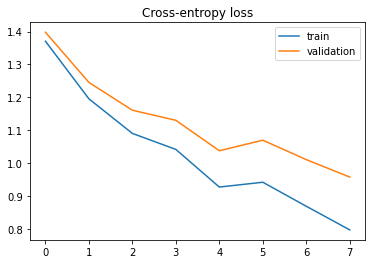

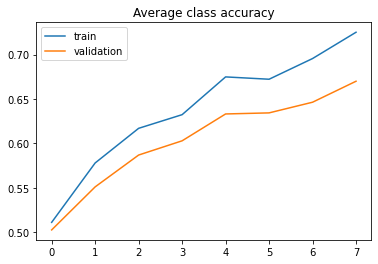

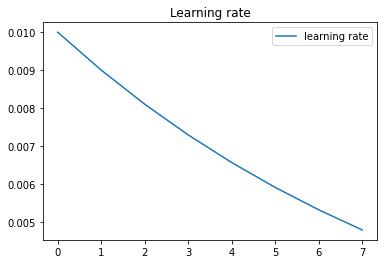

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path

with open('./out/4_cifar/accuracies_train.txt') as f:
    accuracies_train = f.read().splitlines()
    
with open('./out/4_cifar/accuracies_valid.txt') as f:
    accuracies_valid = f.read().splitlines()

with open('./out/4_cifar/learning_rates.txt') as f:
    learning_rates = f.read().splitlines()
    
with open('./out/4_cifar/losses_train.txt') as f:
    losses_train = f.read().splitlines()
     
with open('./out/4_cifar/losses_valid.txt') as f:
    losses_valid = f.read().splitlines()   

accuracies_train = [float(i) for i in accuracies_train]
accuracies_valid = [float(i) for i in accuracies_valid]
learning_rates = [float(i) for i in learning_rates]
losses_train = [float(i) for i in losses_train]
losses_valid = [float(i) for i in losses_valid]

x = np.arange(8)
plt.plot(x, losses_train, label="train")
plt.plot(x, losses_valid, label="validation")
plt.title("Cross-entropy loss")
plt.legend(loc='best')
plt.show()

plt.plot(x, accuracies_train, label="train")
plt.plot(x, accuracies_valid, label="validation")
plt.title("Average class accuracy")
plt.legend(loc='best')
plt.show()

plt.plot(x, learning_rates, label="learning rate")
plt.title("Learning rate")
plt.legend(loc='best')
plt.show()

#### Podzadatak c)
Prikažite 20 netočno klasificiranih slika s najvećim gubitkom te ispišite njihov točan razred, kao i 3 razreda za koje je model dao najveću vjerojatnost.
#### Odgovor c)


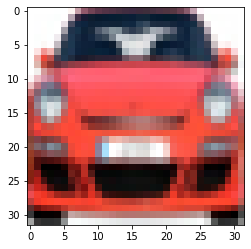

Predictions: 
cat
automobile
truck


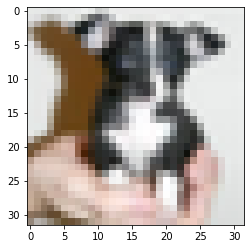

Predictions: 
deer
dog
cat


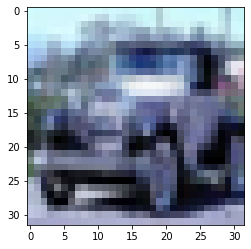

Predictions: 
airplane
automobile
truck


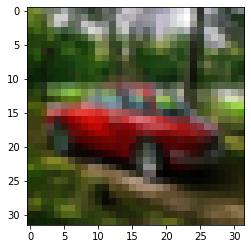

Predictions: 
ship
automobile
truck


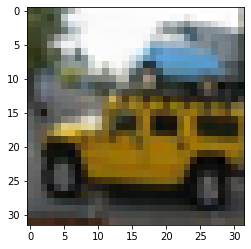

Predictions: 
frog
automobile
truck


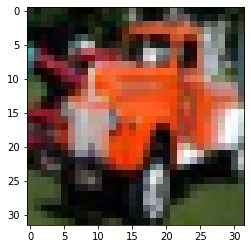

Predictions: 
frog
truck
automobile


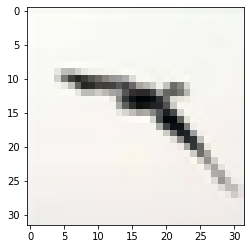

Predictions: 
deer
bird
airplane


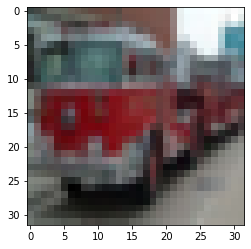

Predictions: 
ship
truck
automobile


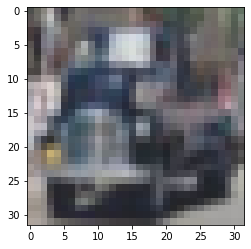

Predictions: 
cat
automobile
truck


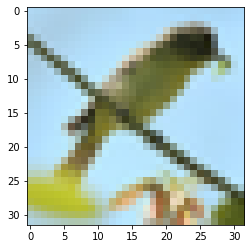

Predictions: 
deer
bird
airplane


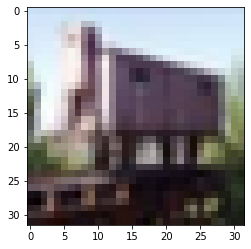

Predictions: 
cat
truck
horse


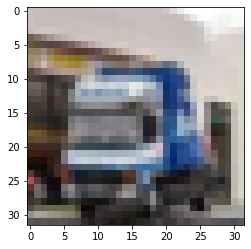

Predictions: 
ship
truck
automobile


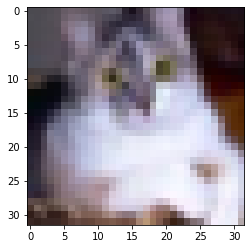

Predictions: 
horse
cat
dog


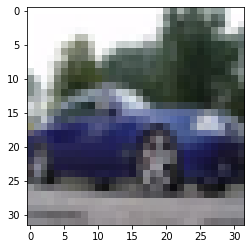

Predictions: 
bird
automobile
truck


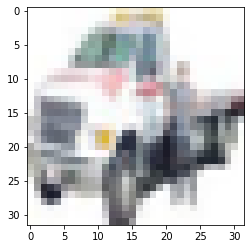

Predictions: 
airplane
automobile
truck


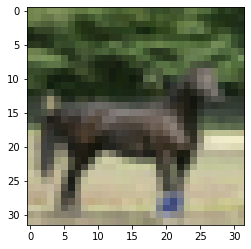

Predictions: 
bird
horse
deer


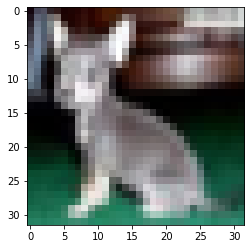

Predictions: 
horse
cat
dog


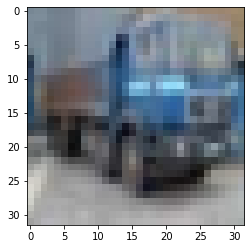

Predictions: 
airplane
automobile
truck


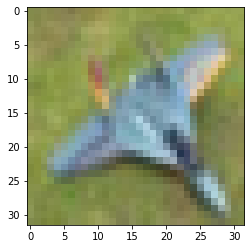

Predictions: 
dog
airplane
bird


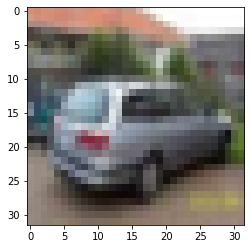

Predictions: 
ship
automobile
truck


In [21]:
import os
from sklearn.metrics import confusion_matrix
import pickle
import numpy as np
import torch
from torch import nn
from pathlib import Path
from torch import optim
import matplotlib.pyplot as plt
import os
import math
import skimage as ski
import skimage.io


decode = ["airplane", "automobile","bird", "cat","deer","dog","frog","horse","ship","truck"]


def draw_image(img, mean, std):
  img = img.transpose(1, 2, 0)
  img *= std
  img += mean
  img = img.astype(np.uint8)
  ski.io.imshow(img)
  ski.io.show()
    

with open('./out/4_cifar/worst/worst_predictions.txt') as f:
    worst_predictions = f.read().splitlines()

worst_predictions = [int(i) for i in worst_predictions]

j=0
for i in range(20):
    image = Image.open(f'out/4_cifar/worst/{i}.png')
    plt.imshow(image)
    plt.show()
    print("Predictions: ")
    print(decode[worst_predictions[j]])
    print(decode[worst_predictions[j+1]])
    print(decode[worst_predictions[j+2]])
    j+=3
